

# Project: Investigate a Dataset - [TMDb_movie_data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings , genres , cast and revenue. 

>**Note**: The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


### Question(s) for Analysis

>**In this report will will try to understand the dataset and  answer the following questions :**

>What is the highest grossing movies?

>Number of  Movies released per year

>Which Director has the highest movies counts?

>The highest grossing director

>Most popular genres

>Relationship between runtime and vote average 

In [1]:
#loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling


###  Exploring and Cleaning the data




In [3]:
#loading the data
df = pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09



### Data Cleaning
> As we can see in the above dataset , there are some columns that will no help in the investigation so we will remove (drop ) the from the dataset.

>These columns are : **id , imbd id , revenue , budget , cast , homepage , tagline , overview** 

>We will use adjusted budget and adjusted revenue instead of budget and revenue columns
 

In [4]:
df.drop(columns = ['id','imdb_id','revenue','budget','cast','homepage','keywords','tagline','overview'],axis=1,inplace=True)

In [5]:
df.head(1)

,popularity,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
popularity              10866 non-null float64
original_title          10866 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(3), object(5)
memory usage: 1018.8+ KB


In [7]:
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


**From the above table we will notice that budget_adj and revenue_adj has zero values , so we will replace those values.**

In [8]:
(df['budget_adj'] == 0).sum() , (df['revenue_adj'] == 0).sum() , (df['runtime'] == 0).sum()

(5696, 6016, 31)

In [9]:
(df['budget_adj'] == 0).all() ,(df['revenue_adj'] == 0).all(),(df['runtime'] == 0).all()

(False, False, False)

**Those are alot of zero values so we will replacing them with mean values for each column**

In [10]:
df.replace(0,df.mean(axis=0),inplace=True)

In [11]:
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,102.362065,217.389748,5.974922,2001.322658,2.675136e+07,7.980243e+07
std,1.000185,30.902781,575.619058,0.935142,12.812941,3.050850e+07,1.365610e+08
min,0.000065,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.207583,90.000000,17.000000,5.400000,1995.000000,1.755104e+07,5.136436e+07
50%,0.383856,99.000000,38.000000,6.000000,2006.000000,1.755104e+07,5.136436e+07
75%,0.713817,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,5.136436e+07
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [12]:
(df['budget_adj'] == 0).sum() , (df['revenue_adj'] == 0).sum() , (df['runtime'] == 0).sum()

(0, 0, 0)

# Checking for duplicate rows

In [14]:
duplicateRows = df[df.duplicated()]
print(duplicateRows)

      popularity original_title          director  runtime  \
2090     0.59643         TEKKEN  Dwight H. Little     92.0   

                                           genres    production_companies  \
2090  Crime|Drama|Action|Thriller|Science Fiction  Namco|Light Song Films   

     release_date  vote_count  vote_average  release_year  budget_adj  \
2090      3/20/10         110           5.0          2010  30000000.0   

      revenue_adj  
2090     967000.0  


In [15]:
sum(df.duplicated())

1

**So we have one duplicate row , we will remove that.**

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
sum(df.duplicated())

0

In [18]:
df.dtypes

popularity              float64
original_title           object
director                 object
runtime                 float64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

>**We want to change release year format to date time**

>**We want to change runtime , budget_adj ,revenue_adj to integer**

In [19]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [20]:
df['runtime'] = df['runtime'].astype(int)
df['budget_adj'] = df['budget_adj'].astype(int)
df['revenue_adj'] = df['revenue_adj'].astype(int)

In [21]:
df.dtypes

popularity                     float64
original_title                  object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                       int64
revenue_adj                      int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis



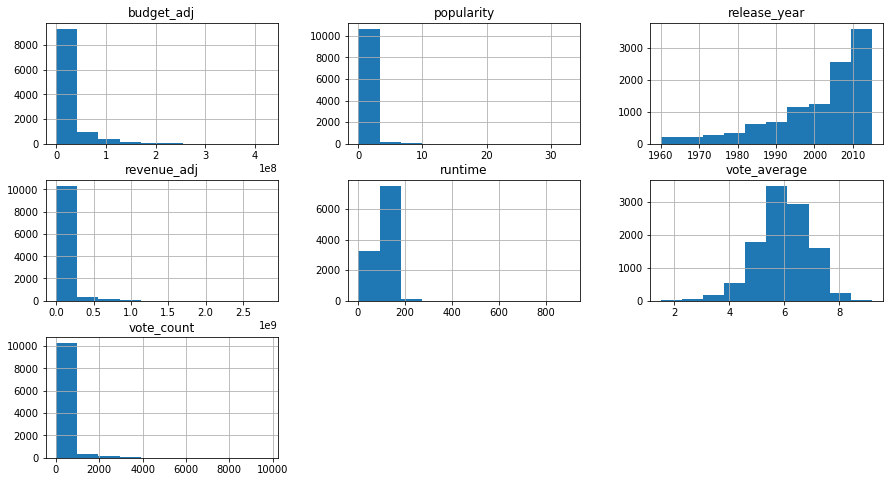

In [21]:
df.hist(figsize=(15,8));

# What is the highest grossing movies?

In [22]:
#highest grossing movie
print(df.original_title[df.revenue_adj==df.revenue_adj.max()])
print(df.revenue_adj[df.revenue_adj==df.revenue_adj.max()])

1386    Avatar
Name: original_title, dtype: object
1386    2827123750
Name: revenue_adj, dtype: int64


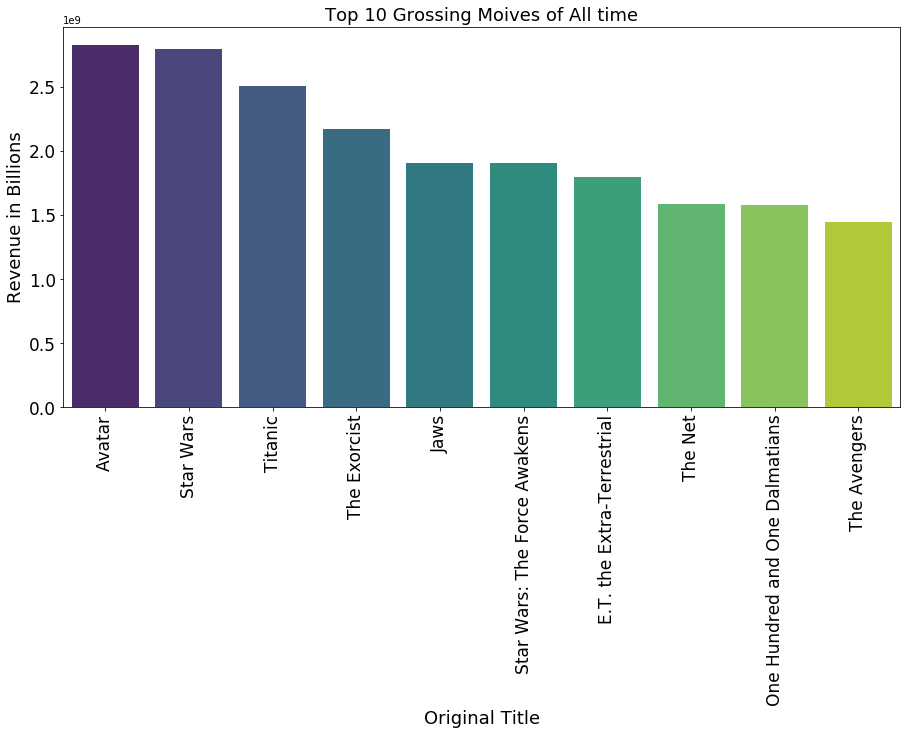

In [23]:
plt.figure(figsize=(15,7))
#make a dataset for orignal_title and revenue
dm=df[['original_title','revenue_adj']].sort_values('revenue_adj',ascending= False).head(10)
sns.barplot(x='original_title',y='revenue_adj',data=dm,palette="viridis")
#color palette fo graph
plt.xlabel('Original Title',fontsize=18)
plt.ylabel('Revenue in Billions',fontsize=18)
plt.title('Top 10 Grossing Moives of All time',fontsize=18)
plt.xticks(rotation =90)
plt.xticks(fontsize= 17) 
plt.yticks(fontsize= 17)
plt.show()

# Movies released per year

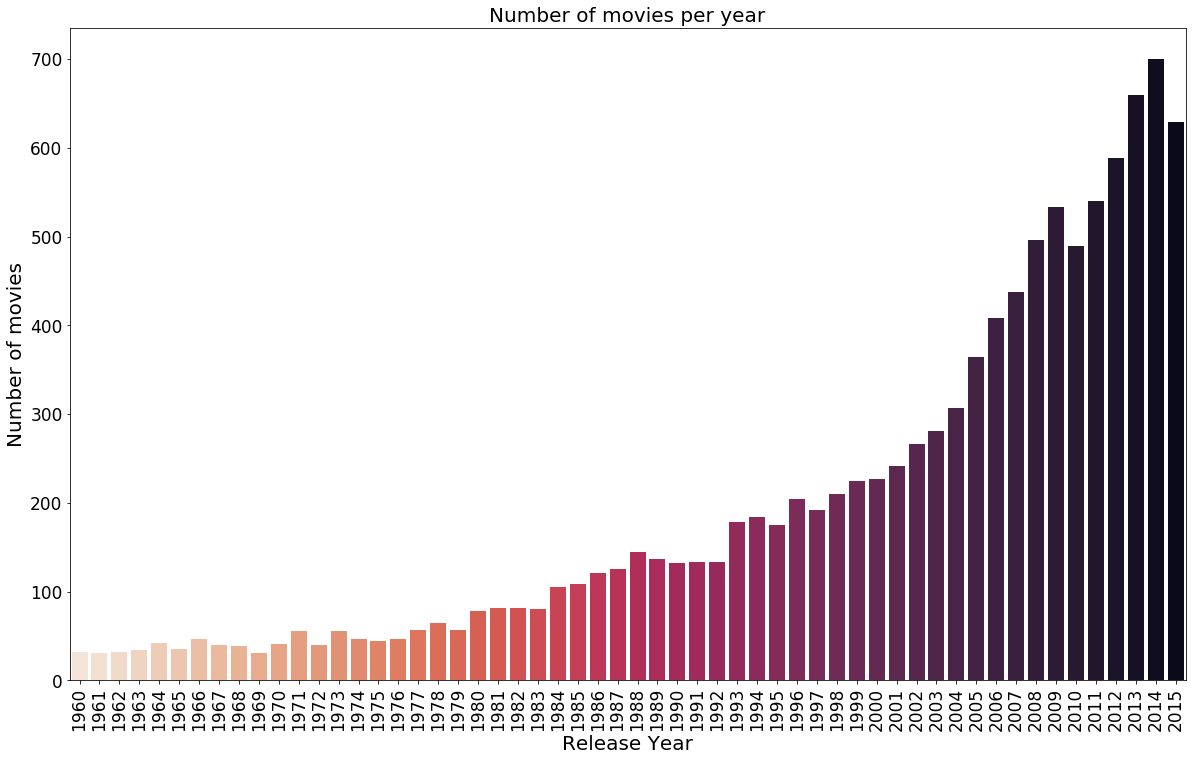

In [24]:
plt.figure(figsize=(20,12))
sns.countplot(df['release_year'],palette="rocket_r")
plt.xlabel('Release Year',fontsize=20)
plt.ylabel('Number of movies',fontsize=20)
plt.title('Number of movies per year',fontsize=20)
plt.xticks(rotation =90)
plt.xticks(fontsize= 17) 
plt.yticks(fontsize= 17)
plt.show()

**2014 is the highest year with movie count**

In [25]:
df['release_year'][df['release_year']==2014].count()

700

# Which Director has the highest movies counts?

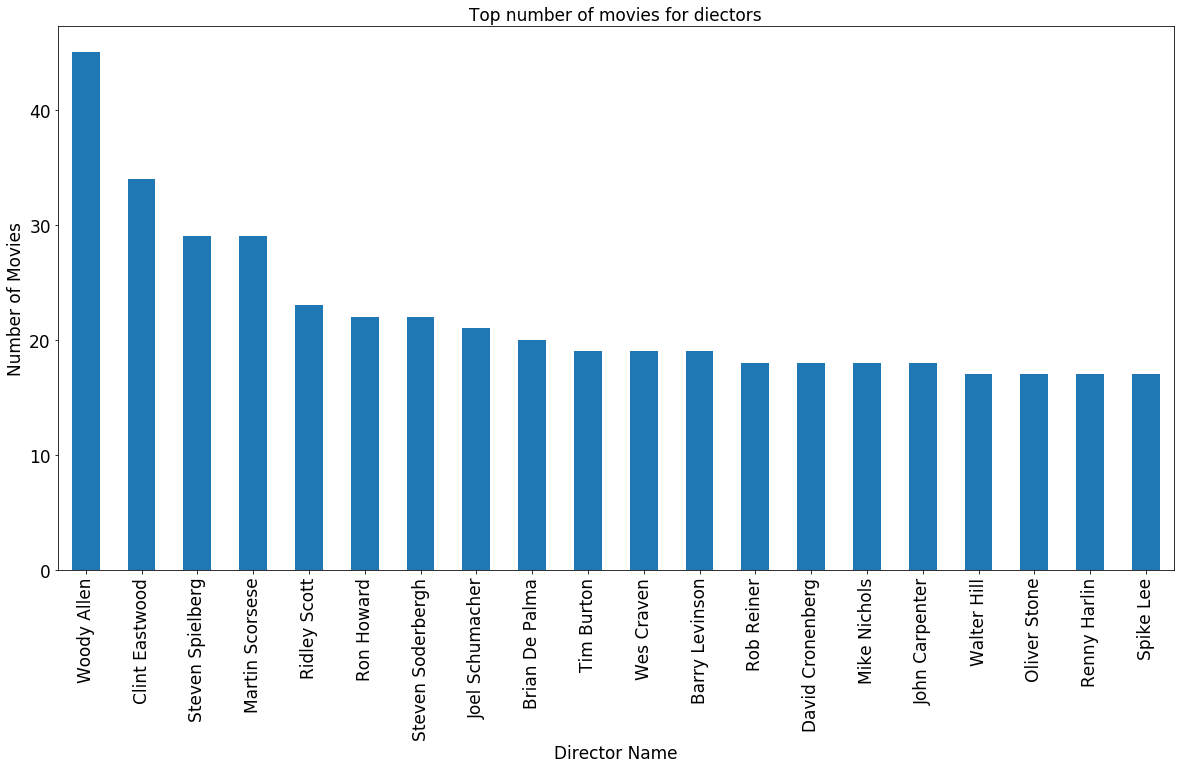

In [26]:
plt.figure(figsize=(20,10))
df['director'].value_counts().head(20).plot.bar()
plt.xlabel('Director Name',fontsize=17)
plt.ylabel('Number of Movies',fontsize=17)
plt.title('Top number of movies for diectors',fontsize=17)
plt.xticks(rotation =90)
plt.xticks(fontsize= 17) 
plt.yticks(fontsize= 17)
plt.show()

**Woody Allen has directed the highest number of movies**

In [27]:
df['director'][df['director']=='Woody Allen'].count()

45

# The highest grossing director 

In [28]:
dk=df.groupby('director').sum().sort_values('revenue_adj',ascending= False)
dk.head(10)
dkk=dk.head(10)


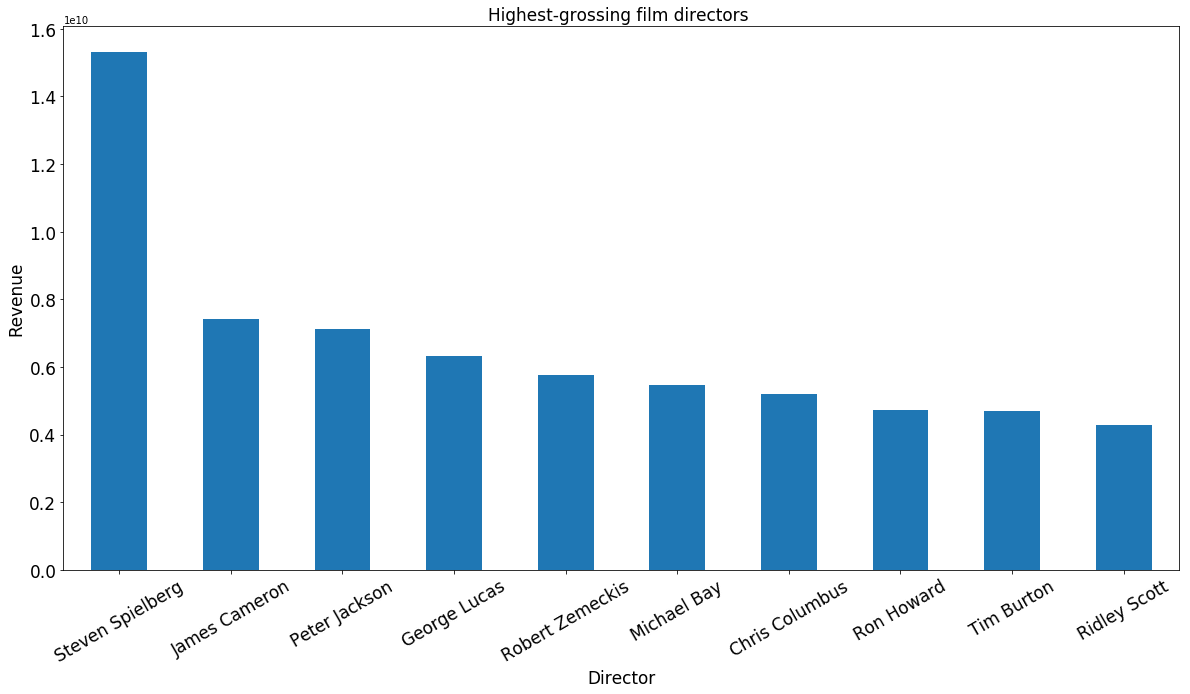

In [29]:
plt.figure(figsize=(20,10))
dkk['revenue_adj'].plot(kind="bar")
plt.title("Highest-grossing film directors ",fontsize=17)
plt.xticks(rotation=30, horizontalalignment="center")
plt.xlabel("Director",fontsize=17)
plt.ylabel("Revenue",fontsize=17)
plt.xticks(fontsize= 17) 
plt.yticks(fontsize= 17) 
plt.show()

**I think production companies loves Steven spielberg , he is the highest grossing movie director of all time**

# Production companies  movie count

In [31]:
d_production_comp=df['production_companies'].str.get_dummies(sep='|')

In [32]:
d_production_comps=d_production_comp[d_production_comp.columns].apply(lambda x:sum(x.values))

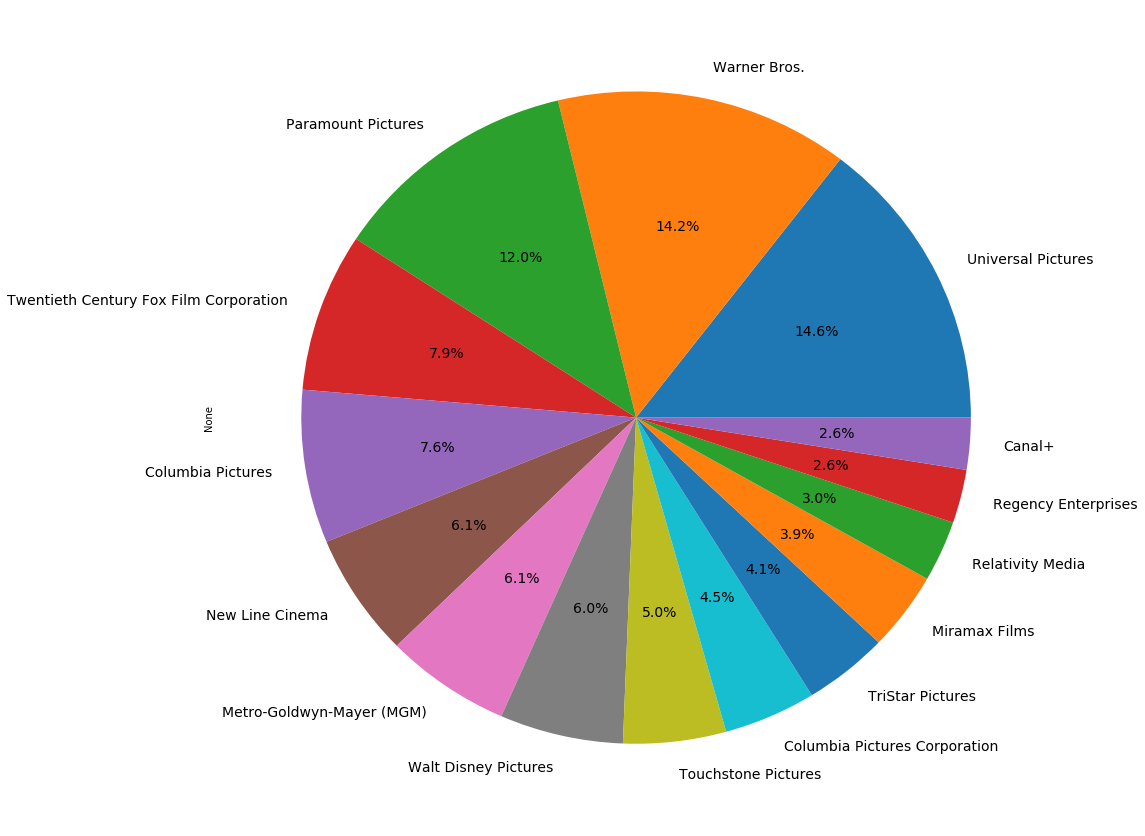

In [62]:
plt.figure(figsize=(15,15))
d_production_comps.sort_values(0,ascending=False).head(15).plot.pie(autopct='%1.1f%%',textprops={'fontsize': 14})
plt.show()

**Universal pictures produces the highest amount of movies**

# Most popular genres

In [46]:
#d_genre=df['genres'].str.get_dummies(sep='|')

In [47]:
#d_genres=d_genre.sum().reset_index()

In [48]:
#plt.figure(figsize=(15,12))
#sns.barplot(x=d_genre.sum(),y=d_genre.columns,data=d_genres,palette="Spectral")
#plt.xlabel('Genres',fontsize=18)
#plt.ylabel('')
#plt.title('Most popular Genres',fontsize=18)
#plt.xticks(rotation =0)
#plt.xticks(fontsize= 17) 
#plt.yticks(fontsize= 17)
#plt.show()

**Drama is the most poopular genre.**

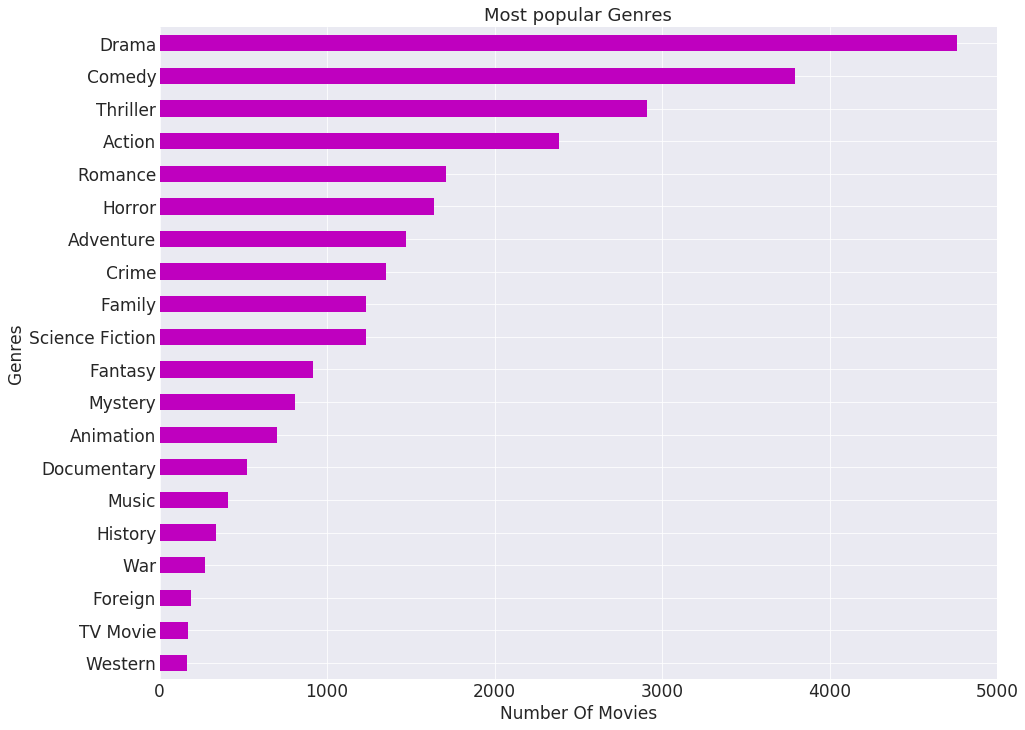

In [49]:
#we are going to create a function to separate and count each genre

def count_genre(x):
    d_plt = df[x].str.cat(sep = '|')
    data = pd.Series(d_plt.split('|'))
    info = data.value_counts(ascending=True)
    return info

#we are going to call the function for counting the movies of each genre.
genre_movies = count_genre('genres')
genre_movies.plot(kind= 'barh',figsize = (15,12),fontsize=12,color='m')

#setup the title and the labels of the plot.
plt.title("Most popular Genres",fontsize=18)
plt.xlabel('Number Of Movies',fontsize=17)
plt.ylabel("Genres",fontsize= 17)
sns.set_style("darkgrid")
plt.xticks(rotation =0)
plt.xticks(fontsize= 17) 
plt.yticks(fontsize= 17);

# Relationship between runtime and vote average 

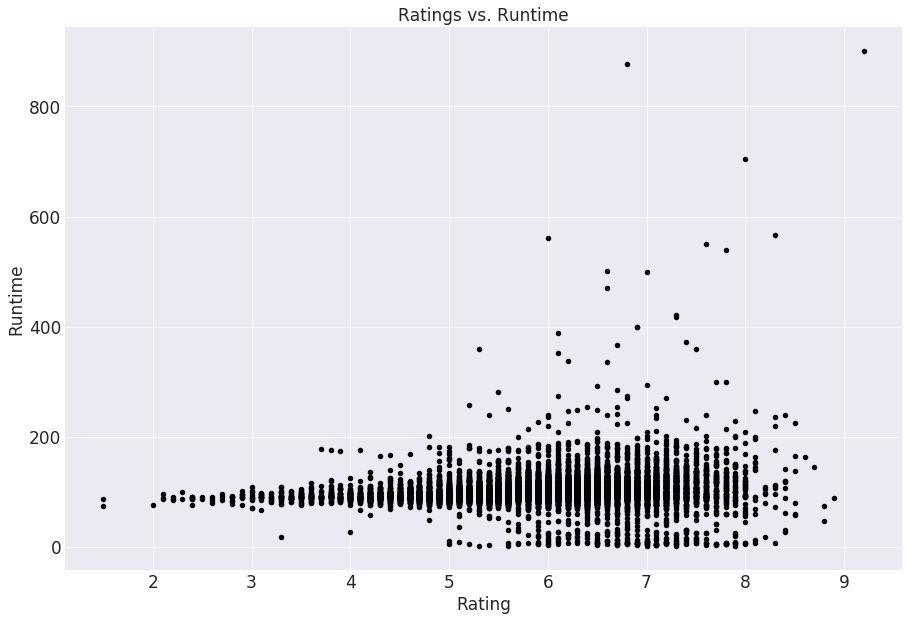

In [45]:
# Plot scatter plot of these two columns
df.plot(x='vote_average', y='runtime', kind='scatter', figsize=(15,10),color='k')
plt.title('Ratings vs. Runtime',fontsize=17)
plt.xlabel('Rating',fontsize=17)
plt.ylabel('Runtime',fontsize=17)
plt.xticks(fontsize= 17) 
plt.yticks(fontsize= 17);

**Mid runtime range movies dose not have a pattern for ratings**

**Longer runtime movies have higher rate between 5 and 8 , but there are a few long runtime movies compared to others**

<a id='conclusions'></a>
## Conclusions

>**What is the highest grossing movies?**

>Avatar , A james cameron movie

>**Number of Movies released per year**

>Wow this industry is so huge , 2014 has 700 movies ( the highest of all time)

>**Which Director has the highest movies counts?**

>Woody Allen

>**The highest grossing director**

>Steven spielberg

>**Top 5 popular genres**

>Drama 
Comedy
Thriller
Action 
Romance

>**Relationship between runtime and vote average**

>Mid runtime range movies dose not have a pattern for ratings
Longer runtime movies have higher rate between 5 and 8 , but there are a few long runtime movies compared to others

### Limitations

>**Alot of cells had zero value we filled the cells with the mean value for the column , if those value were non zero it would made the analysis more accurate.**

>**During the data cleaning, We split the data seperated by '|'  (genres & production companies) to make the exploration easier, but this process took quite long time compared to other process.**


## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [50]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0